# Task 5

# Feature Engineering & Selection

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Loading The Dataset

In [2]:
# Load the Dataset
data = pd.read_csv('Heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Display the First Few Rows of the Dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Display Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Feature Engineering

### Create New Features

In [6]:
# Example: Creating a New Feature 'age_chol_ratio'
data['age_chol_ratio'] = data['age'] / (data['chol'] + 1)

In [7]:
# Example: Creating Interaction Features
data['age_cp'] = data['age'] * data['cp']

### Handling Categorical Variables

In [8]:
# One-Hot Encoding for Categorical Features
data = pd.get_dummies(data, columns=['sex', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)

### Feature Scaling

In [9]:
# Separate Features and Target
X = data.drop('target', axis=1)
y = data['target']

In [10]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Feature Selection

### Using PCA:-

In [11]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

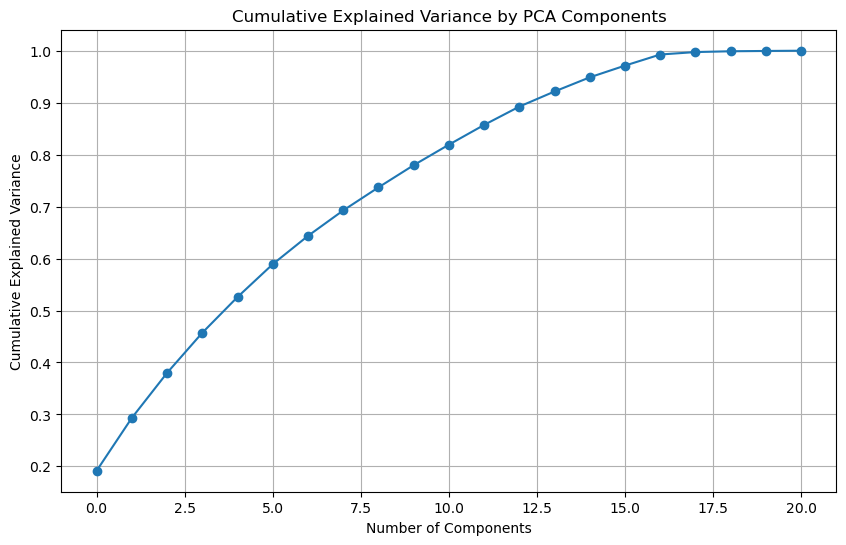

In [13]:
# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [14]:
# Choose the Number of Components that Explain the Majority of Variance
n_components = np.where(cumulative_explained_variance > 0.95)[0][0] + 1
print(f'Number of components to retain: {n_components}')

Number of components to retain: 16


In [15]:
# Transform the Data with Selected Number of Components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

### Using Feature Importance:-

In [16]:
# Train a RandomForestClassifier to get Feature Importances
model = RandomForestClassifier()
model.fit(X_scaled, y)

RandomForestClassifier()

In [17]:
# Get Feature Importances
importances = model.feature_importances_

In [18]:
# Create a DataFrame for Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

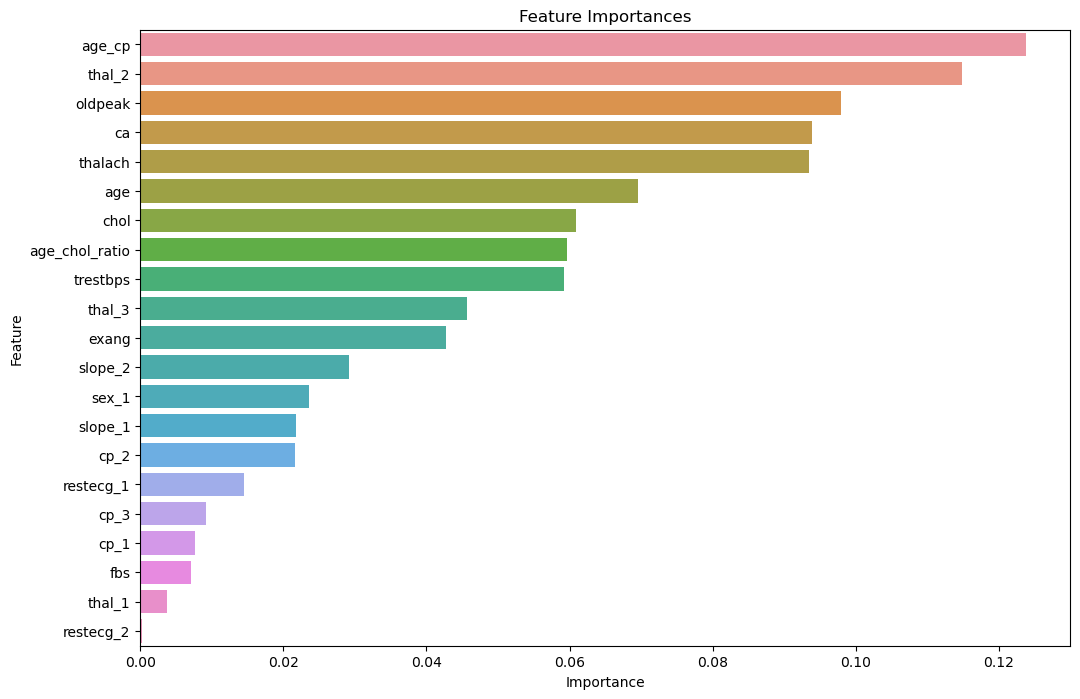

In [19]:
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [20]:
# Select Important Features based on Importance Threshold
selector = SelectFromModel(model, threshold='mean', prefit=True)
X_important = selector.transform(X_scaled)

## Model Training & Evaluation

In [21]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

In [22]:
# Train a Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Evaluate the Model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.97
